In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import scipy.stats as st
import sympy as sym
import sympy.plotting.plot as syplot
from IPython.display import display
import random

[ 7 -4  6  6  9  8  8  0  9  4  0  9 -2  5  1]
[3.38649500e-02 5.65602263e-07 1.24582189e-02 1.24582189e-02
 2.50230016e-01 9.20544783e-02 9.20544783e-02 3.08808372e-05
 2.50230016e-01 1.68603658e-03 3.08808372e-05 2.50230016e-01
 4.17926685e-06 4.58312261e-03 8.39428186e-05]


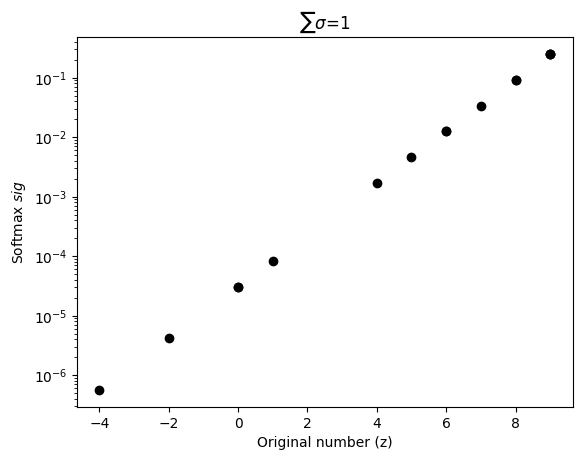

In [2]:
################################# Sodtmax ##################################

# Generating Random integers

z = np.random.randint(-5,high=10,size=15)
print(z)

#Computing Softmax

num = np.exp(z)
den = np.sum(num)
sig = num/den
print(sig)

#Compare
plt.plot(z,sig,'ko')
plt.xlabel("Original number (z)")
plt.yscale('log')
plt.ylabel('Softmax $sig$')
plt.title('$\sum\sigma$=%g' %np.sum(sig))
plt.show()

tensor([3.3865e-02, 5.6560e-07, 1.2458e-02, 1.2458e-02, 2.5023e-01, 9.2054e-02,
        9.2054e-02, 3.0881e-05, 2.5023e-01, 1.6860e-03, 3.0881e-05, 2.5023e-01,
        4.1793e-06, 4.5831e-03, 8.3943e-05])


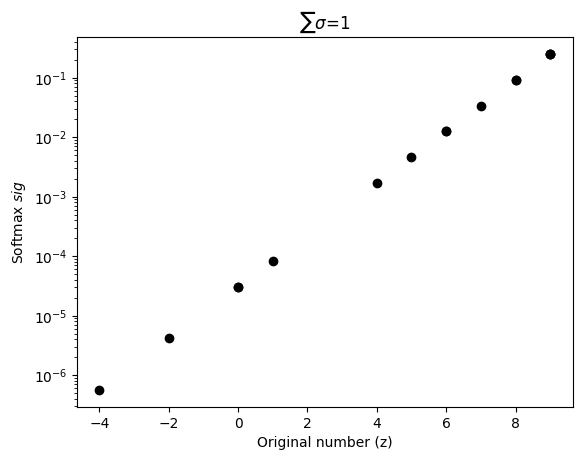

In [3]:
## Using Instance
softmx = nn.Softmax(dim=0)
sigmaT = softmx(torch.Tensor(z))
print(sigmaT)
plt.plot(z,sig,'ko')
plt.xlabel("Original number (z)")
plt.yscale('log')
plt.ylabel('Softmax $sig$')
plt.title('$\sum\sigma$=%g' %np.sum(sig))
plt.show()

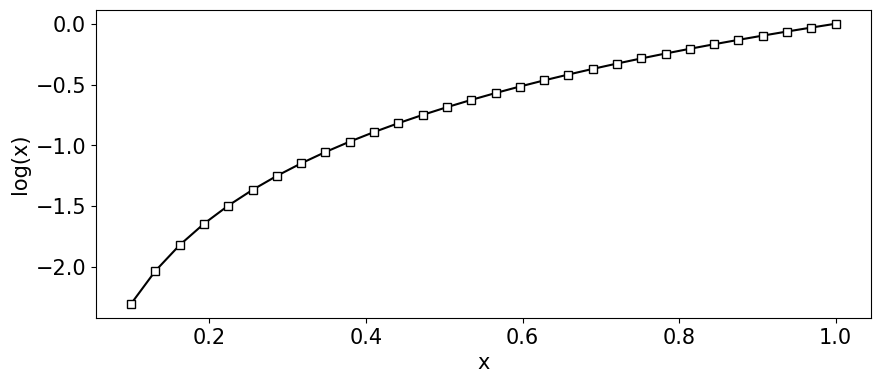

In [4]:
# logarithms
x = np.linspace(0.1,1,30)
logx = np.log(x)
fig = plt.figure(figsize=(10,4))
plt.rcParams.update({'font.size':15})
plt.plot(x,logx,'ks-',markerfacecolor='w')
plt.xlabel('x')
plt.ylabel('log(x)')
plt.show()

In [5]:
################################## Entropy ##################################
# Probability of something
P = [.25,.75]
H = 0
for p in P:
    H += -p*np.log(p)
    
print(f"Entropy is {str(H)}")

Entropy is 0.5623351446188083


In [6]:
## Cross Entropy
p = [.9,0.1]
q = [.3,.7]
H = 0
for i in range(len(p)):
    H += -(q[i]*np.log(p[i]))
print(f"Cross entropy is {str(H)}")

Cross entropy is 1.6434177197931796


In [7]:
### Torch Entropy ###

p_tensor = torch.Tensor(p)
q_tensor = torch.Tensor(q)

F.binary_cross_entropy(p_tensor,q_tensor)


tensor(1.6434)

In [8]:
############################### Maximum and Minimum #########################

#Creating Random array

v = np.random.randint(-5,high=10,size=9)
print(v)

#Find minimum and maximum values
minval = np.min(v)
maxval = np.max(v)
print(str("Min:"),minval,"\t",str("Max:"),maxval)

#Find Position of minimum and maximum values
minvalarg = np.argmin(v)
maxvalarg = np.argmax(v)
print(str("Min position:"),minvalarg,"\t",str("Max position:"),maxvalarg)

[ 5  0 -1  4  0  1  1  3  7]
Min: -1 	 Max: 7
Min position: 2 	 Max position: 8


In [9]:
##################################### Maximum and Minimum in matricies############################

M = np.random.randint(1,30,(2,3))
print(M)

#Find minimum and maximum values
minvalM = np.min(M) #Minimum value of the Matrix 
minvalC = np.min(M,axis=0) #Minimum value of each column
minvalR = np.min(M,axis=1) #Minimum value of each Row
print(" Minimum value of the Matrix:",minvalM,'\t',"Minimum value of each column:",minvalC,'\t',"Minimum value of each Row",minvalR)


#Find minimum and maximum values Positions
arg_minvalM = np.argmin(M) #Position of Minimum value of the Matrix Position
arg_minvalC = np.argmin(M,axis=0) #Position of Minimum value of each column
arg_minvalR = np.argmin(M,axis=1) #Position of Minimum value of each Row
print(" Position of Minimum value of the Matrix:",arg_minvalM,'\n',"Position of Minimum value of each column:",arg_minvalC,'\n',"Position of Minimum value of each Row",arg_minvalR)

[[25 28  1]
 [21 29 16]]
 Minimum value of the Matrix: 1 	 Minimum value of each column: [21 28  1] 	 Minimum value of each Row [ 1 16]
 Position of Minimum value of the Matrix: 2 
 Position of Minimum value of each column: [1 0 0] 
 Position of Minimum value of each Row [2 2]


In [10]:
############################### Maximum and Minimum in Torch #########################

#Creating Random array

v = torch.tensor(v)
print(v)

#Find minimum and maximum values
minval = torch.min(v)
maxval = torch.max(v)
print(str("Min:"),minval,"\t",str("Max:"),maxval)

#Find Position of minimum and maximum values
minvalarg = torch.argmin(v)
maxvalarg = torch.argmax(v)
print(str("Min position:"),minvalarg,"\t",str("Max position:"),maxvalarg)

tensor([ 5,  0, -1,  4,  0,  1,  1,  3,  7], dtype=torch.int32)
Min: tensor(-1, dtype=torch.int32) 	 Max: tensor(7, dtype=torch.int32)
Min position: tensor(2) 	 Max position: tensor(8)


In [11]:
##################################### Maximum and Minimum in Torch ############################

M = torch.tensor(M)
print(M,end='\n \n')


#Find minimum and maximum values
minvalM = torch.min(M) #Minimum value of the Matrix 
minvalC = torch.min(M,axis=0) #Minimum value of each column
minvalR = torch.min(M,axis=1) #Minimum value of each Row
print(" Minimum value of the Matrix:",minvalM,'\n',"Minimum value of each column:",minvalC.values,'\n',"Minimum value of each Row",minvalR.values)


#Find minimum and maximum values Positions
arg_minvalM = torch.argmin(M) #Position of Minimum value of the Matrix Position
# arg_minvalC = torch.argmin(M,axis=0) #Position of Minimum value of each column
# arg_minvalR = torch.argmin(M,axis=1) #Position of Minimum value of each Row
print(" Position of Minimum value of the Matrix:",arg_minvalM,'\n',"Position of Minimum value of each column:",minvalC.indices,'\n',"Position of Minimum value of each Row",minvalR.indices)
 

tensor([[25, 28,  1],
        [21, 29, 16]], dtype=torch.int32)
 
 Minimum value of the Matrix: tensor(1, dtype=torch.int32) 
 Minimum value of each column: tensor([21, 28,  1], dtype=torch.int32) 
 Minimum value of each Row tensor([ 1, 16], dtype=torch.int32)
 Position of Minimum value of the Matrix: tensor(2) 
 Position of Minimum value of each column: tensor([1, 0, 0]) 
 Position of Minimum value of each Row tensor([2, 2])


In [12]:
##################################### Mean and Variance ############################

#Mean
x = np.random.randint(1,30,(1,3))
print(x)
X_mean = np.mean(x)
print(X_mean)

#Variance
X_var = np.var(x,ddof=1)
print(X_var)

[[16 15 19]]
16.666666666666668
4.333333333333334


In [13]:
##################################### Samples ############################
#Creating Random array
A = random.sample(range(1430, 10001), 290)
print(A[:5],"etc....")

#Calculating the array mean
A_mean = round(np.mean(A),2)
print(A_mean)

#Compute the Sample mean
S = np.random.choice(A,size=round(.3*len(A)),replace=False)
S_mean = round(np.mean(S),2)
print(S_mean)

#Error
er = round(abs(A_mean - S_mean),2)
print(f"Error is {er}")

[2096, 4015, 9414, 2118, 2597] etc....
5817.93
5431.18
Error is 386.75


In [14]:
############################## Creating Seeds ###########################
randseed1 = np.random.RandomState(21)
randseed2 = np.random.RandomState(32)
print(randseed1.randint(10298))
print(np.random.randint(10))
print(randseed2.randint(19999))

5327
7
10967


In [15]:
############################## Creating Seeds PyTorch ###########################
torch.manual_seed(3)
print(torch.randn(3))
print(torch.randn(4))
print(np.random.randint(6))

tensor([0.8033, 0.1748, 0.0890])
tensor([-0.6137,  0.0462, -1.3683,  0.3375])
4


In [16]:
############################## T-test ###########################

#Parameters
n1  = 30
n2  = 40
mu1 = 1
mu2 = 2

#Generate data
data1 = mu1+np.random.randn(9)
data2 = mu2+np.random.randn(8)

t,p = st.ttest_ind(data1,data2)
print(t)
print(p)


-0.5769140323212405
0.5725546861308495


In [17]:
############################## Derivatives ###########################

x = sym.symbols('x')

#Create function
fx = 2*x**2
gx = 4*x**3 - 3*x**4
#Compute Derivative
df = sym.diff(fx,x)
df2 = sym.diff(fx*gx)
print(df)
display(df)
print(df2)
display(df2)

4*x


4*x

2*x**2*(-12*x**3 + 12*x**2) + 4*x*(-3*x**4 + 4*x**3)


2*x**2*(-12*x**3 + 12*x**2) + 4*x*(-3*x**4 + 4*x**3)

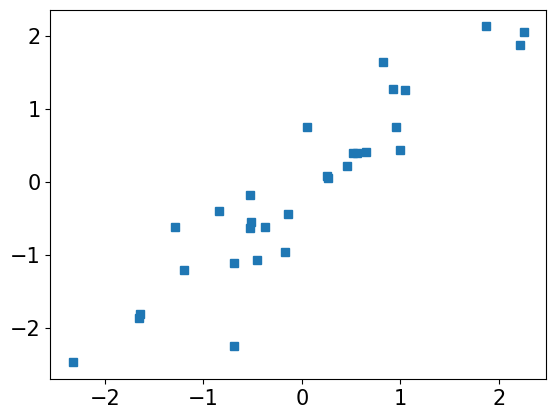

In [18]:
############################## Regression ###########################

x = torch.randn(30,1)
y =x + torch.randn(30,1)/2

plt.plot(x,y,'s')
plt.show()

In [19]:
ANNreg = nn.Sequential(
    nn.Linear(1,1),
    nn.ReLU(),
    nn.Linear(1,1))
ANNreg

Sequential(
  (0): Linear(in_features=1, out_features=1, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1, out_features=1, bias=True)
)

In [20]:
LR= .05
LF = nn.MSELoss()
optimizer = torch.optim.SGD(ANNreg.parameters(),lr=LR)


In [21]:
#Training the model
numepochs = 500
losses = torch.zeros(numepochs)

for epochi in range(numepochs):
    yHat = ANNreg(x)
    loss = LF(yHat,y)
    losses[epochi] = loss
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

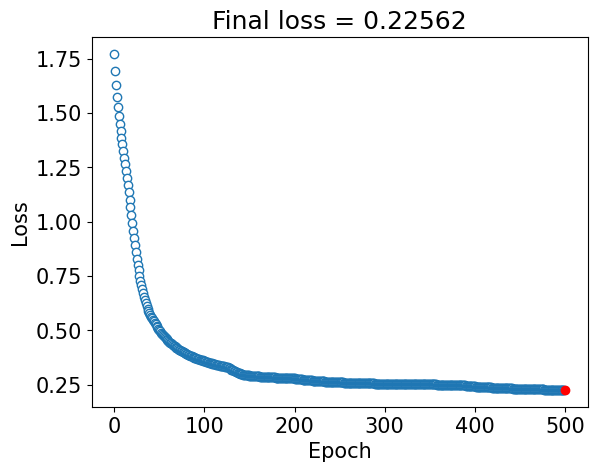

In [22]:
predictions  = ANNreg(x)
testloss = (predictions - y).pow(2).mean()
plt.plot(losses.detach(),'o',markerfacecolor='w',linewidth=.1)
plt.plot(numepochs,testloss.detach(),'ro')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Final loss = %g' %testloss.item())
plt.show()